<a href="https://colab.research.google.com/github/dennisli8246/Machine-Leaning/blob/main/Tensor_test_8_3_ResNet18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ResNet18

使用ResNet18模型，進行圖片分類。將所有照片分成1000種不同的類別。最後來測試圖片與類別是否符合預期。

下載資料
https://gist.github.com/ageitgey/4e1342c10a71981d0b491e1b8227328b
將資料存成imagenet_classes.csv


step 1:匯入套件

In [ ]:
from PIL import Image
import torch
from torchvision import transforms
from torchvision import models
import numpy as np
import pandas as pd

step 2:載入及顯示dog.jpg

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


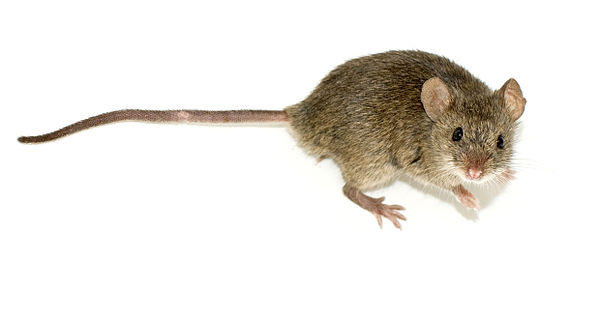

In [ ]:
from google.colab import drive#google colab會把檔案讀到google drive中 #沒有上傳才執行
# 將自己的雲端硬碟掛載上去
drive.mount('/content/drive')#連結自己的雲端硬碟
#img=Image.open("/content/drive/My Drive/Colab Notebooks/imgData/dog.jpg")#colab好像無法使用
#img.show()#colab好像無法使用

from google.colab.patches import cv2_imshow,cv2
img=cv2.imread("/content/drive/My Drive/Colab Notebooks/imgData/mouse2.jpg")
cv2_imshow(img)

img=Image.open("/content/drive/My Drive/Colab Notebooks/imgData/mouse2.jpg")#colab好像無法使用
#img.show()#colab好像無法使用

step 3:定義transforms

In [ ]:
preprocess=transforms.Compose([
  transforms.Resize(256), #轉換尺寸
  transforms.CenterCrop(244),#中心裁減
  transforms.ToTensor()   #轉為張亮
])

step 4:進行圖片預處理

In [ ]:
img2 = preprocess(img)#img=Image.open(//...)#注意要用Image.open去打開
print(img2.shape)

torch.Size([3, 244, 244])


step 5:將圖片轉成4D陣列

In [ ]:
img3 = torch.unsqueeze(img2,0)#在第0軸增加代表批次數的軸
print(img3.shape)
#output: torch.Size([1, 3, 244, 244])[批次數,通道,高,寬]

torch.Size([1, 3, 244, 244])


step 6:建立預訓練模型

In [ ]:
resnet=models.resnet18(weights='ResNet18_Weights.DEFAULT')

step 7:進行預測

In [ ]:
resnet.eval()
out=resnet(img3)

step 8:找出最大對應的索引值

In [ ]:
out_numpy=out.detach().numpy()    #轉為Numpy
out_class=np.argmax(out_numpy,axis=1) #找出最大索引值
print(out_class)#[out_class=208]

[674]


step 9:讀取1000個標籤名稱的文字檔imagenet_classes.csv,記得要刪除掉標頭的文字檔案

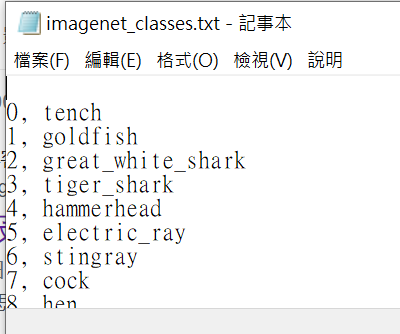

In [ ]:
df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/imgData/imagenet_classes.csv",header=None)

print(df.head())

   0                   1
0  0               tench
1  1            goldfish
2  2   great_white_shark
3  3         tiger_shark
4  4          hammerhead


step 10:找出索引類別

In [ ]:
label = df.iloc[out_class].values
print(label)

[[674 ' mousetrap']]


step 11:將輸出通過softmax()函數，讓數值介於0~1之間再乘上100

In [ ]:
score = torch.nn.functional.softmax(out,dim=1)[0]*100

step 12:印出對標籤的信心百分比

In [ ]:
print(f"score:{score[out_class].item():.2f}")

score:47.86
